<a href="https://colab.research.google.com/github/zmarshall4497/dsba/blob/main/Midterm_DSBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all necessary packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing file
from google.colab import files 
import io

upload = files.upload()

dfZM = pd.read_csv(io.BytesIO(upload['restaurants.csv']))

Saving restaurants.csv to restaurants.csv


The goal of this is to predict what factors contribute to the popularity of a resteraunt. The variables are as follows:

•	entity_ID: ID for selected restaurants

•	location_name: name of restaurants 

•	price: price level for the restaurants .....one = $ , two = $ $ , three = $ $ $ , four = $ $ $ $

•	exotic: indicator whether the restaurant is exotic or not. 

•	avg_length: average length of textual reviews. 

•	avg_negativity: average negativity of textual reviews. 

•	avg_positivity: average positivity of textual reviews. 

•	avg_subjectivity: average subjectivity of textual reviews. 

•	avg_readability: average readability of textual reviews. 

•	useful: number of useful reviews 

•	funny: number of funny reviews 

•	cool: number of cool reviews 

•	popularity: 1= popular, 0 = non popular 


In [3]:
#Examining the Data / Summary / Structure
dfZM.head()

,entity_id,location_name,sub_category,price,exotic,avg_length,avg_negativity,avg_positivity,avg_subjectivity,avg_readablity,useful,funny,cool,popularity
0,1,Dunkin',Snack and Nonalcoholic Beverage Bars,one,0.0,78.433472,0.045646,0.072637,0.472389,82.086990,0.000000,0.0,0.000000,1
1,2,House of Tibet Kitchen,Limited-Service Restaurants,two,1.0,113.076860,0.058292,0.224257,0.709735,72.584427,4.000000,1.0,0.000000,0
2,3,honeygrow,Limited-Service Restaurants,two,0.0,74.220901,0.045527,0.150131,0.543687,77.486710,21.333333,7.0,15.833333,1
3,4,Starbucks,Snack and Nonalcoholic Beverage Bars,two,0.0,38.766666,0.083615,0.019077,0.409231,78.366920,4.000000,0.0,0.000000,0
4,5,Tom Yum Koong,Full-Service Restaurants,two,1.0,98.985954,0.043990,0.168973,0.579528,83.057953,13.833333,7.5,2.000000,1


In [4]:
dfZM.describe(include='all')

,entity_id,location_name,sub_category,price,exotic,avg_length,avg_negativity,avg_positivity,avg_subjectivity,avg_readablity,useful,funny,cool,popularity
count,999.000000,986,986,984,979.000000,957.000000,957.000000,957.000000,957.000000,957.000000,999.000000,999.000000,999.000000,999.000000
unique,NaN,718,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Dunkin',Full-Service Restaurants,one,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,92,514,497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,483.132132,NaN,NaN,NaN,0.304392,86.381662,0.055988,0.178358,0.564876,80.103313,13.340695,4.562226,6.405432,0.500501
std,277.138511,NaN,NaN,NaN,0.460385,24.942186,0.037159,0.072944,0.070012,5.829734,21.586018,9.967090,12.869735,0.500250
min,1.000000,NaN,NaN,NaN,0.000000,8.880000,0.000000,0.000292,0.152124,34.890530,0.000000,0.000000,0.000000,0.000000
25%,242.500000,NaN,NaN,NaN,0.000000,71.597168,0.030239,0.127310,0.533451,77.618584,1.000000,0.000000,0.000000,0.000000
50%,485.000000,NaN,NaN,NaN,0.000000,86.272346,0.046529,0.182310,0.571667,80.513985,5.400000,1.000000,1.333333,1.000000
75%,725.500000,NaN,NaN,NaN,1.000000,101.366330,0.075124,0.223996,0.600339,83.265312,17.000000,5.000000,7.000000,1.000000


In [5]:
dfZM.shape

(999, 14)

In [6]:
dfZM.isnull().sum()

entity_id            0
location_name       13
sub_category        13
price               15
exotic              20
avg_length          42
avg_negativity      42
avg_positivity      42
avg_subjectivity    42
avg_readablity      42
useful               0
funny                0
cool                 0
popularity           0
dtype: int64

In [7]:
dfZM.location_name.nunique()

718

In [8]:
dfZM.price.unique()

array(['one', 'two', 'three', nan, 'four'], dtype=object)

In [9]:
dfZM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entity_id         999 non-null    int64  
 1   location_name     986 non-null    object 
 2   sub_category      986 non-null    object 
 3   price             984 non-null    object 
 4   exotic            979 non-null    float64
 5   avg_length        957 non-null    float64
 6   avg_negativity    957 non-null    float64
 7   avg_positivity    957 non-null    float64
 8   avg_subjectivity  957 non-null    float64
 9   avg_readablity    957 non-null    float64
 10  useful            999 non-null    float64
 11  funny             999 non-null    float64
 12  cool              999 non-null    float64
 13  popularity        999 non-null    int64  
dtypes: float64(9), int64(2), object(3)
memory usage: 109.4+ KB


In [10]:
#replacing price object dtypes for one, two, three and four to numbers
dfZM['price'].replace({'one':1, 'two':2, 'three':3, 'four':4}, inplace=True)

In [11]:
dfZM.price.unique()

array([ 1.,  2.,  3., nan,  4.])

In [12]:
#filling null values for price by using mode
dfZM.price.mode()

0    1.0
dtype: float64

In [13]:
dfZM.price.fillna(1, inplace=True)

In [14]:
dfZM.isnull().sum()

entity_id            0
location_name       13
sub_category        13
price                0
exotic              20
avg_length          42
avg_negativity      42
avg_positivity      42
avg_subjectivity    42
avg_readablity      42
useful               0
funny                0
cool                 0
popularity           0
dtype: int64

In [15]:
#Filling Avg_Length, Avg_Negativity, Avg_Positivity, Avg_Subjectivity and Avg_Readability with the mean.
dfZM.avg_length.fillna(dfZM.avg_length.mean(),inplace=True)
dfZM.avg_negativity.fillna(dfZM.avg_negativity.mean(),inplace=True)
dfZM.avg_positivity.fillna(dfZM.avg_positivity.mean(),inplace=True)
dfZM.avg_subjectivity.fillna(dfZM.avg_subjectivity.mean(),inplace=True)
dfZM.avg_readablity.fillna(dfZM.avg_readablity.mean(),inplace=True)

In [16]:
dfZM.isnull().sum()

entity_id            0
location_name       13
sub_category        13
price                0
exotic              20
avg_length           0
avg_negativity       0
avg_positivity       0
avg_subjectivity     0
avg_readablity       0
useful               0
funny                0
cool                 0
popularity           0
dtype: int64

In [17]:
dfZM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entity_id         999 non-null    int64  
 1   location_name     986 non-null    object 
 2   sub_category      986 non-null    object 
 3   price             999 non-null    float64
 4   exotic            979 non-null    float64
 5   avg_length        999 non-null    float64
 6   avg_negativity    999 non-null    float64
 7   avg_positivity    999 non-null    float64
 8   avg_subjectivity  999 non-null    float64
 9   avg_readablity    999 non-null    float64
 10  useful            999 non-null    float64
 11  funny             999 non-null    float64
 12  cool              999 non-null    float64
 13  popularity        999 non-null    int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 109.4+ KB


In [18]:
#filling exotic with the mode
dfZM.exotic.mode()

0    0.0
dtype: float64

In [19]:
dfZM.exotic.fillna(0.0, inplace=True)

In [20]:
dfZM.isnull().sum()

entity_id            0
location_name       13
sub_category        13
price                0
exotic               0
avg_length           0
avg_negativity       0
avg_positivity       0
avg_subjectivity     0
avg_readablity       0
useful               0
funny                0
cool                 0
popularity           0
dtype: int64

In [21]:
#drop location name and sub category since we have entity id to identify the restaraunt
dfZM.drop(['location_name','sub_category'], axis=1, inplace=True)


In [22]:
dfZM.head()

,entity_id,price,exotic,avg_length,avg_negativity,avg_positivity,avg_subjectivity,avg_readablity,useful,funny,cool,popularity
0,1,1.0,0.0,78.433472,0.045646,0.072637,0.472389,82.086990,0.000000,0.0,0.000000,1
1,2,2.0,1.0,113.076860,0.058292,0.224257,0.709735,72.584427,4.000000,1.0,0.000000,0
2,3,2.0,0.0,74.220901,0.045527,0.150131,0.543687,77.486710,21.333333,7.0,15.833333,1
3,4,2.0,0.0,38.766666,0.083615,0.019077,0.409231,78.366920,4.000000,0.0,0.000000,0
4,5,2.0,1.0,98.985954,0.043990,0.168973,0.579528,83.057953,13.833333,7.5,2.000000,1


In [23]:
dfZM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entity_id         999 non-null    int64  
 1   price             999 non-null    float64
 2   exotic            999 non-null    float64
 3   avg_length        999 non-null    float64
 4   avg_negativity    999 non-null    float64
 5   avg_positivity    999 non-null    float64
 6   avg_subjectivity  999 non-null    float64
 7   avg_readablity    999 non-null    float64
 8   useful            999 non-null    float64
 9   funny             999 non-null    float64
 10  cool              999 non-null    float64
 11  popularity        999 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 93.8 KB


In [24]:
#Assign X and Y Variables, Popularity is my prediction variable - so is my Y. I want to keep everything else
X = dfZM.drop(['popularity'], axis=1)
y = dfZM['popularity']  

In [25]:
#Checking for Skewness for all variables in the DF
X.skew()

entity_id          -0.020870
price               0.706659
exotic              0.883061
avg_length          0.283632
avg_negativity      1.662572
avg_positivity      0.302892
avg_subjectivity   -0.838868
avg_readablity     -1.830955
useful              4.467137
funny               5.432734
cool                4.272157
dtype: float64

In [26]:
#Useful, funny and cool have > 2 skewness, will use transform (not log since they will have 0 or negative values)
def combine(x):
  if x>0:
    return 1
  else:
    return 0
X['useful']=X['useful'].apply(combine)
X['funny'] = X['funny'].apply(combine)
X['cool'] = X['cool'].apply(combine)

In [29]:
X.skew()

entity_id          -0.020870
price               0.706659
exotic              0.883061
avg_length          0.283632
avg_negativity      1.662572
avg_positivity      0.302892
avg_subjectivity   -0.838868
avg_readablity     -1.830955
useful             -1.540369
funny              -0.546600
cool               -0.573537
dtype: float64

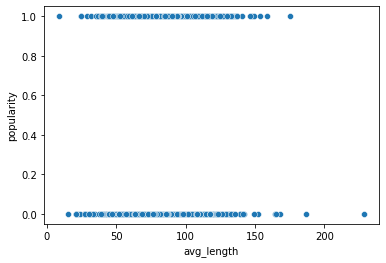

In [31]:
#Model Free Evidence, using visuals for longer reviews / popularity

#I will use a scatterplot for this, as well as summary statistics
sns.scatterplot(x='avg_length', y='popularity', data=dfZM)

#show the plot
plt.show()

In [32]:
#summary stats
print(dfZM.groupby('popularity')['avg_length'].describe())

            count       mean        std        min        25%        50%  \
popularity                                                                 
0           499.0  84.030753  25.229797  15.455556  70.495052  84.560120   
1           500.0  88.727869  23.357089   8.880000  74.638574  88.369732   

                   75%        max  
popularity                         
0            97.638966  228.45000  
1           103.753208  175.14626  


In [30]:
#implement VIF for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,entity_id,4.019795
1,price,9.155374
2,exotic,1.556268
3,avg_length,13.486238
4,avg_negativity,6.395266
5,avg_positivity,15.475473
6,avg_subjectivity,69.933689
7,avg_readablity,71.348436
8,useful,8.536048
9,funny,4.964781


In [34]:
X.corr()

,entity_id,price,exotic,avg_length,avg_negativity,avg_positivity,avg_subjectivity,avg_readablity,useful,funny,cool
entity_id,1.000000,0.028390,0.018251,0.010652,0.019386,-0.006276,-0.013910,0.012723,0.005560,-0.006858,-0.005331
price,0.028390,1.000000,0.271691,0.131283,-0.160590,0.154990,0.042689,-0.044382,0.131502,0.181783,0.207320
exotic,0.018251,0.271691,1.000000,0.067586,-0.087892,0.097063,0.033697,0.019779,0.083731,0.125978,0.131927
avg_length,0.010652,0.131283,0.067586,1.000000,0.111452,-0.173117,-0.100878,-0.038842,0.037517,0.047324,0.008485
avg_negativity,0.019386,-0.160590,-0.087892,0.111452,1.000000,-0.655441,-0.053253,0.006544,-0.019478,-0.072630,-0.208795
avg_positivity,-0.006276,0.154990,0.097063,-0.173117,-0.655441,1.000000,0.338121,0.049933,0.044238,0.044589,0.172222
avg_subjectivity,-0.013910,0.042689,0.033697,-0.100878,-0.053253,0.338121,1.000000,0.061913,0.057537,0.040202,0.055188
avg_readablity,0.012723,-0.044382,0.019779,-0.038842,0.006544,0.049933,0.061913,1.000000,0.074930,0.066256,0.069857
useful,0.005560,0.131502,0.083731,0.037517,-0.019478,0.044238,0.057537,0.074930,1.000000,0.561109,0.563969
funny,-0.006858,0.181783,0.125978,0.047324,-0.072630,0.044589,0.040202,0.066256,0.561109,1.000000,0.615852


In [ ]:
#Removing avg subjectivity and avg readability
X = X.drop(columns=['avg_subjectivity', 'avg_readablity'])


In [38]:
# implementing the regression
from sklearn.model_selection import train_test_split

X_trainZM, X_testZM, y_trainZM, y_testZM = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
#Fit a Logistic Regression
import statsmodels.api as sm
log_regZM = sm.Logit(y_trainZM, X_trainZM).fit()

print(log_regZM.summary())

Optimization terminated successfully.
         Current function value: 0.653265
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             popularity   No. Observations:                  799
Model:                          Logit   Df Residuals:                      790
Method:                           MLE   Df Model:                            8
Date:                Wed, 22 Feb 2023   Pseudo R-squ.:                 0.05751
Time:                        00:58:05   Log-Likelihood:                -521.96
converged:                       True   LL-Null:                       -553.81
Covariance Type:            nonrobust   LLR p-value:                 8.716e-11
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
entity_id         -0.0003      0.000     -1.054      0.292      -0.001       0.000
price            

In [40]:
#Interpret Useful Coefficient
#The coefficient of .0174 indicates that for each additional unit of the predictor variable (useful), the outcome variable (popularity) is expected to increase by .0174 units. Therefore, a higher number of useful reviews will likely lead to higher popularity.

0.6206206206206206

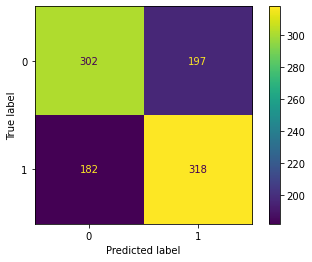

In [41]:
#Model Eval
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
prediction_probZM = log_regZM.predict(X)
predictionZM=list(map(round,prediction_probZM))
cm= confusion_matrix(y,predictionZM)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

accuracy_score(y,predictionZM)

Log: ROC AUC =0.657


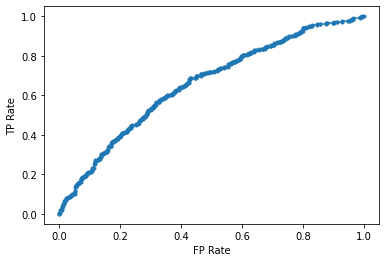

In [42]:
#model eval - roc curve
from sklearn.metrics import roc_curve, roc_auc_score

lr_aucZM = roc_auc_score(y,prediction_probZM)
print('Log: ROC AUC =%.3f'% (lr_aucZM))

lr_fpr, lr_tpr, threshold = roc_curve(y, prediction_probZM)
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.show()

In [48]:
#Plotting the tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text

dtreeZM = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split=30, random_state = 0)
dtreeZM = dtreeZM.fit(X_trainZM, y_trainZM)



In [49]:
#decision tree in test

r = export_text(dtreeZM, feature_names=list(X_trainZM.columns.values))
print(r)

|--- avg_negativity <= 0.03
|   |--- entity_id <= 615.50
|   |   |--- avg_length <= 100.92
|   |   |   |--- entity_id <= 530.50
|   |   |   |   |--- class: 0
|   |   |   |--- entity_id >  530.50
|   |   |   |   |--- class: 1
|   |   |--- avg_length >  100.92
|   |   |   |--- class: 1
|   |--- entity_id >  615.50
|   |   |--- avg_positivity <= 0.19
|   |   |   |--- class: 0
|   |   |--- avg_positivity >  0.19
|   |   |   |--- entity_id <= 938.50
|   |   |   |   |--- class: 0
|   |   |   |--- entity_id >  938.50
|   |   |   |   |--- class: 1
|--- avg_negativity >  0.03
|   |--- exotic <= 0.50
|   |   |--- avg_length <= 86.39
|   |   |   |--- avg_positivity <= 0.29
|   |   |   |   |--- class: 1
|   |   |   |--- avg_positivity >  0.29
|   |   |   |   |--- class: 0
|   |   |--- avg_length >  86.39
|   |   |   |--- funny <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- funny >  0.50
|   |   |   |   |--- class: 1
|   |--- exotic >  0.50
|   |   |--- avg_length <= 106.79
|   |   |   |---

In [50]:
#fit a decision tree with max_depth argument
for d in max_depth_list:
    dtreeZM = DecisionTreeClassifier(max_depth=d)
    dtreeZM.fit(X_trainZM, y_trainZM)
    cv_scores.append(dtreeZM.score(X_testZM, y_testZM))

#find the best pruned max_depth
best_depth = max_depth_list[cv_scores.index(max(cv_scores))]
print('The optimal max_depth argument is:', best_depth)

The optimal max_depth argument is: 2


The top three most important predictors in the model are: ['entity_id', 'avg_length', 'avg_negativity']


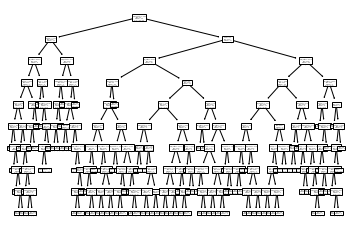

In [52]:
from sklearn.tree import plot_tree
# Calculate the accuracy of the best pruned model on the test data
best_score = dtreeZM.score(X_testZM, y_testZM)

# Visualize the best pruned model
plot_tree(dtreeZM, feature_names=list(X_trainZM.columns.values))

# Determine the top three most important predictors in the model
feature_importances = dtreeZM.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
top_three_features = [list(X_trainZM.columns.values)[i] for i in sorted_indices[:3]]
print('The top three most important predictors in the model are:', top_three_features)

In [57]:
# Calculate the accuracy of the model on the test data
accuracy_dt_ZM = dtreeZM.score(X_testZM, y_testZM)

# Calculate the AUC of the model on the test data
y_pred_dtZM = dtreeZM.predict_proba(X_testZM)[:,1]
auc_dt = roc_auc_score(y_testZM, y_pred_dtZM)

In [59]:
print(accuracy_dt_ZM)

0.545


In [60]:
print(auc_dt)

0.548969587835134
